# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [58]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [60]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [61]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [62]:
# Extract the table
table = soup.find('table', class_='table')  # Adjust class if necessary
rows = table.find_all('tr')

# Extract headers
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Extract all rows of data
data = []
for row in rows[1:]:  # Skip the header row
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [63]:
# Create an empty list
mars_weather_data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    mars_weather_data.append(row_data)

In [64]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

mars_weather_df = pd.DataFrame(mars_weather_data, columns=columns)

In [65]:
# Confirm DataFrame was created successfully
print("Mars Weather DataFrame created successfully!\n")
print(mars_weather_df.head())  # Display the first few rows to confirm structure
print(f"\nDataFrame contains {mars_weather_df.shape[0]} rows and {mars_weather_df.shape[1]} columns.")

Mars Weather DataFrame created successfully!

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0

DataFrame contains 1867 rows and 7 columns.


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [66]:
# Examine data type of each column
print("Data Types Before Conversion:\n")
print(mars_weather_df.dtypes)

Data Types Before Conversion:

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [67]:
# Change data types for data analysis
mars_weather_df['id'] = mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'], errors='coerce')
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [68]:
# Confirm type changes were successful by examining data types again
print("\nData Types After Conversion:\n")
print(mars_weather_df.dtypes)


Data Types After Conversion:

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [69]:
# 1. How many months are there on Mars?
mars_months = mars_weather_df['month'].nunique()
print(f"Number of months on Mars: {mars_months}")

Number of months on Mars: 12


In [70]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_weather_df['sol'].nunique()
print(f"Number of Martian sols in the dataset: {total_sols}")

Number of Martian sols in the dataset: 1867


In [71]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
print(f"{avg_min_temp_by_month}")

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


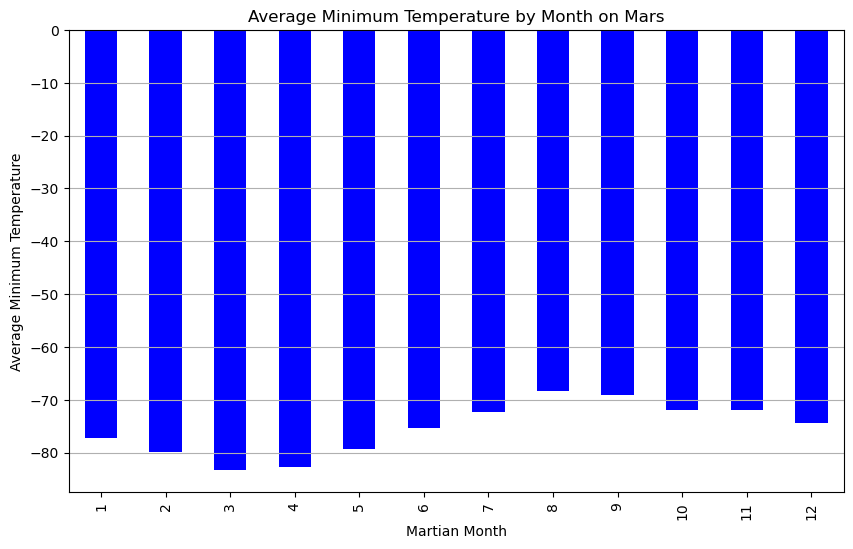

In [72]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='blue')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature by Month on Mars')
plt.grid(axis='y')
plt.show()

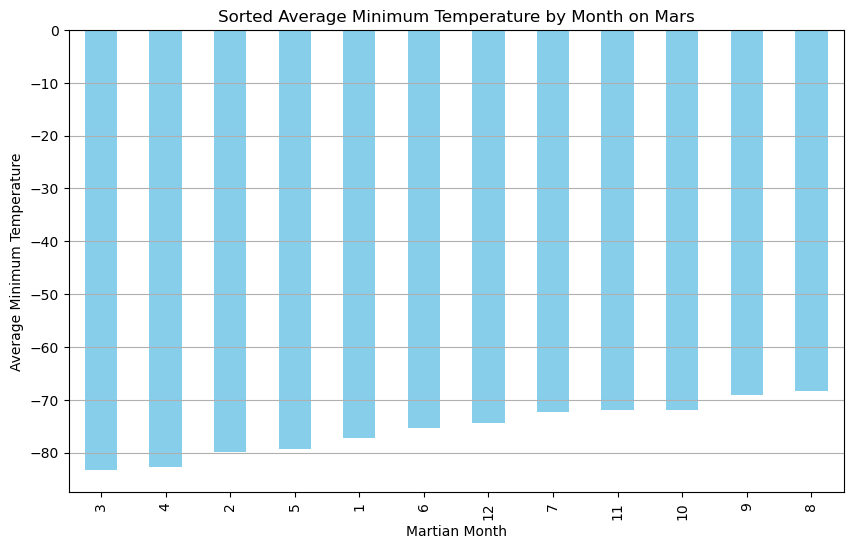

The coldest month on Mars (sorted) is Month 3.
The warmest month on Mars (sorted) is Month 8.


In [73]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperature by month
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Plot the sorted average minimum temperature
plt.figure(figsize=(10, 6))
sorted_avg_min_temp.plot(kind='bar', color='skyblue')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Sorted Average Minimum Temperature by Month on Mars')
plt.grid(axis='y')
plt.show()

# Identify the coldest and warmest months from the sorted data
coldest_month = sorted_avg_min_temp.idxmin()
warmest_month = sorted_avg_min_temp.idxmax()

print(f"The coldest month on Mars (sorted) is Month {coldest_month}.")
print(f"The warmest month on Mars (sorted) is Month {warmest_month}.")

In [74]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


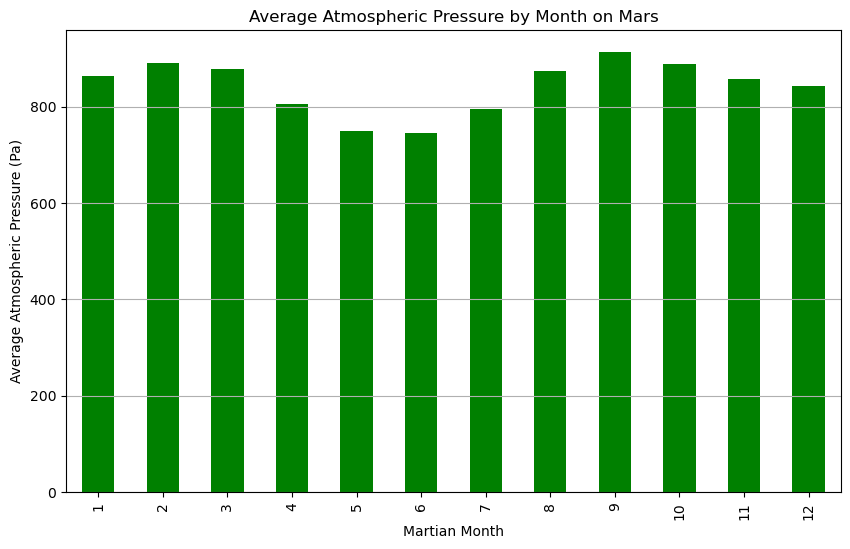

In [75]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='green')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.grid(axis='y')
plt.show()

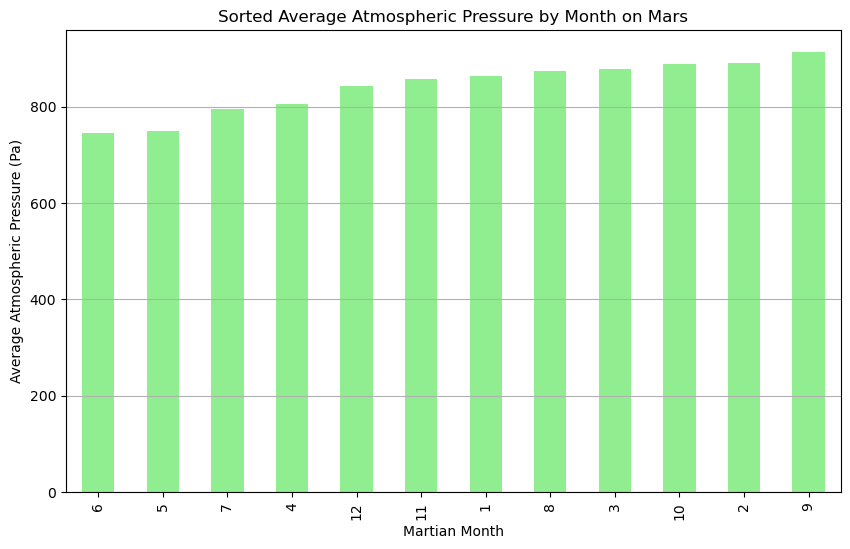

The month with the lowest pressure on Mars (sorted) is Month 6.
The month with the highest pressure on Mars (sorted) is Month 9.


In [76]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the average pressure by month
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Plot the sorted average pressure
plt.figure(figsize=(10, 6))
sorted_avg_pressure.plot(kind='bar', color='lightgreen')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Sorted Average Atmospheric Pressure by Month on Mars')
plt.grid(axis='y')
plt.show()

# Identify the months with the lowest and highest pressure from the sorted data
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()

print(f"The month with the lowest pressure on Mars (sorted) is Month {lowest_pressure_month}.")
print(f"The month with the highest pressure on Mars (sorted) is Month {highest_pressure_month}.")


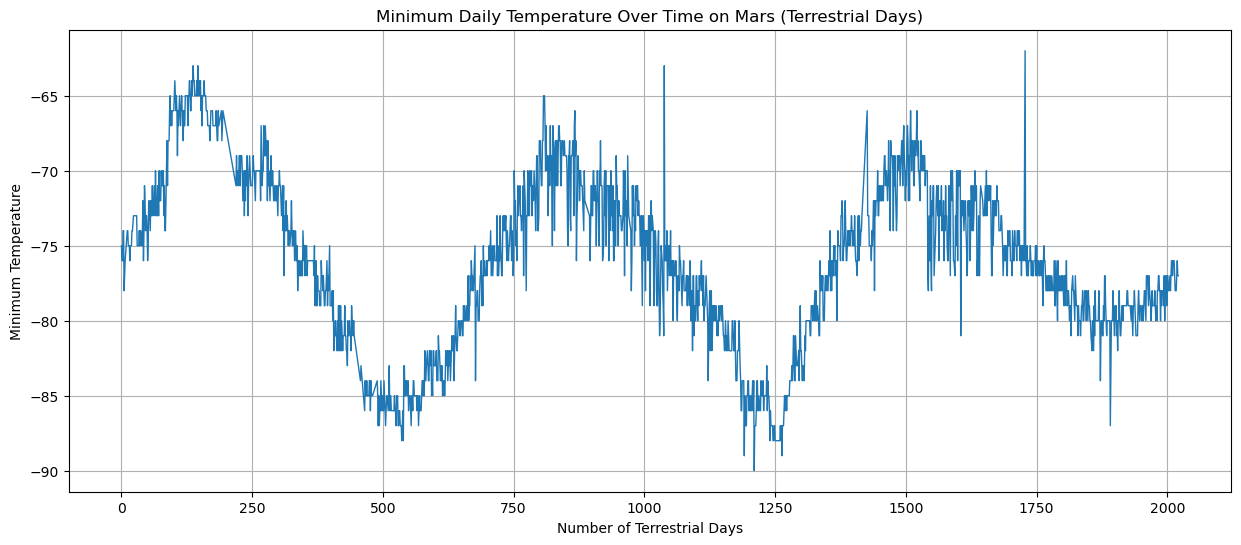

In [77]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Adding a column for the number of terrestrial days since the first date
mars_weather_df['terrestrial_days'] = (mars_weather_df['terrestrial_date'] - mars_weather_df['terrestrial_date'].min()).dt.days

# Plot the daily minimum temperature with terrestrial days as the x-axis
plt.figure(figsize=(15, 6))
plt.plot(mars_weather_df['terrestrial_days'], mars_weather_df['min_temp'], linewidth=1)
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Daily Temperature Over Time on Mars (Terrestrial Days)')
plt.grid()
plt.show()

#### Minimum Temperature

The average minimum temperature on Mars varies greatly across the months on Mars. The bar chart for Average Minimum Temperatures By Month highlights that Winters in Mars are extremely cold while Summer is relatively warmer.

The coldest month at Curiosity's location is Month 3 having the lowest average minimum temperature of (-83.307292). Month 8 shows the highest average minimum temperaure of (-68.382979). 

This extreme temperature variation indicates a harsh and volatile climate, especially during the colder months. It aligns with the fact that Mars lacks a thick atmosphere to retain heat, leading to the drastic temperature drops.
(My Space Museum. "Mars Climate." Retrieved from myspacemuseum.com)



#### Atmospheric Pressure

The atmospheric pressure on Mars also fluctuates greatly across the months in Mars. The lowest average pressure occurs at 745.054422 in Month 6, while the highest pressure is at 913.305970 in Month 9. 

The bar chart of the lowest average pressure by month reveals a pattern where the pressure peaks in the mid-year (Month 9) and reaches its lowest point during the Winter (Month 6). 

These variations in atmospheric pressure are primarily caused by the freezing and sublimination of carbon dioxide at the polar ice caps, which greatly impacts Mar's atmospheric volume. This variability is an important factor to consider for future missions and understanding Mar's weather patterns. (NASA Science. "Pressure Cycles on Mars." Retrieved from science.nasa.gov)



#### Year Length

The chart of daily minimum temperatures across terrestrial days shows clear, repeating temperature cycles. By observing the periodicity of the minimum daily temperature data and identifying the start/end points of one cycle, we can calculate a year length on Mars.

Knowing the length of a year on Mars is critical for planning long term space travel missions. This includes rover's operational lifetimes, energy needs, and the timing of human exploration missions. 
(NASA Jet Propulsion Laboratory. "Mars in a Minute: How Long is a Year on Mars?" Retrieved from jpl.nasa.gov) 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [78]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_cleaned.csv', index=False)
print("Cleaned data saved to 'mars_weather_cleaned.csv'.")

Cleaned data saved to 'mars_weather_cleaned.csv'.


In [79]:
browser.quit()